In [2]:
import pandas as pd
import numpy as np 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
cust_re = pd.read_csv('H:/data science full/analytics lab/python prog/case studies and assignments/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/Customer.csv')
tran_re = pd.read_csv('H:/data science full/analytics lab/python prog/case studies and assignments/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv')
prod_re = pd.read_csv('H:/data science full/analytics lab/python prog/case studies and assignments/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv')

In [4]:
cust_re.head(2)
tran_re.head(2)
prod_re.head(2)
cust_re.head(2)
tran_re.head()
tran_re.head()
cust_re.isnull().sum().sort_values(ascending = False)

city_code      2
Gender         2
DOB            0
customer_Id    0
dtype: int64

In [5]:
cust_re.dropna(inplace =True)
cust_re.isnull().sum().sort_values()
cust_re.shape

(5643, 4)

In [6]:
tran_re.isnull().sum().sort_values()
prod_re.isnull().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [7]:
new_cust_re = cust_re.rename(columns = {"customer_Id": "cust_id"})
new_cust_re.head(2)

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [8]:
cust_sm = pd.merge(new_cust_re,tran_re[['cust_id','transaction_id','tran_date','prod_cat_code','Qty','Rate','Tax','total_amt','Store_type']], on = 'cust_id',how ='left')
cust_sm.head()

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,5.0,5.0,187.0,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,1.619787e+10,16-12-2013,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,1.619787e+10,12-12-2013,4.0,5.0,210.0,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,2.881014e+10,02-09-2013,6.0,2.0,813.0,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,6.463344e+10,06-05-2013,2.0,3.0,312.0,98.280,1034.280,Flagship store


In [9]:
cust_final = pd.merge(cust_sm,prod_re[['prod_cat','prod_cat_code','prod_subcat','prod_sub_cat_code',]], on ='prod_cat_code',how = 'left')
cust_final.head()

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,prod_sub_cat_code
0,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction,7.0
1,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Academic,12.0
2,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Non-Fiction,10.0
3,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Children,11.0
4,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Comics,3.0


In [10]:
column_titles = ['cust_id','DOB','Gender','city_code','transaction_id','tran_date','Store_type','prod_cat','prod_cat_code','prod_subcat','prod_sub_cat_code','Qty','Rate','Tax','total_amt']
cust_final.reindex(columns = column_titles)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,Store_type,prod_cat,prod_cat_code,prod_subcat,prod_sub_cat_code,Qty,Rate,Tax,total_amt
0,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,TeleShop,Books,5.0,Fiction,7.0,5.0,187.0,98.175,1033.175
1,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,TeleShop,Books,5.0,Academic,12.0,5.0,187.0,98.175,1033.175
2,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,TeleShop,Books,5.0,Non-Fiction,10.0,5.0,187.0,98.175,1033.175
3,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,TeleShop,Books,5.0,Children,11.0,5.0,187.0,98.175,1033.175
4,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,TeleShop,Books,5.0,Comics,3.0,5.0,187.0,98.175,1033.175
5,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,TeleShop,Books,5.0,DIY,6.0,5.0,187.0,98.175,1033.175
6,268408,02-01-1970,M,4.0,1.619787e+10,16-12-2013,Flagship store,Bags,4.0,Mens,1.0,-5.0,-210.0,110.250,-1160.250
7,268408,02-01-1970,M,4.0,1.619787e+10,16-12-2013,Flagship store,Bags,4.0,Women,4.0,-5.0,-210.0,110.250,-1160.250
8,268408,02-01-1970,M,4.0,1.619787e+10,12-12-2013,Flagship store,Bags,4.0,Mens,1.0,5.0,210.0,110.250,1160.250
9,268408,02-01-1970,M,4.0,1.619787e+10,12-12-2013,Flagship store,Bags,4.0,Women,4.0,5.0,210.0,110.250,1160.250


In [11]:
cust_final.info()
cust_final["DOB"] = pd.to_datetime(cust_final["DOB"])
cust_final['tran_date'] = pd.to_datetime(cust_final["tran_date"])
cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99358 entries, 0 to 99357
Data columns (total 15 columns):
cust_id              99358 non-null int64
DOB                  99358 non-null object
Gender               99358 non-null object
city_code            99358 non-null float64
transaction_id       99217 non-null float64
tran_date            99217 non-null object
prod_cat_code        99217 non-null float64
Qty                  99217 non-null float64
Rate                 99217 non-null float64
Tax                  99217 non-null float64
total_amt            99217 non-null float64
Store_type           99217 non-null object
prod_cat             99217 non-null object
prod_subcat          99217 non-null object
prod_sub_cat_code    99217 non-null float64
dtypes: float64(8), int64(1), object(6)
memory usage: 12.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99358 entries, 0 to 99357
Data columns (total 15 columns):
cust_id              99358 non-null int64
DOB                  9935

In [12]:
cust_final.head(10)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,prod_sub_cat_code
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction,7.0
1,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Academic,12.0
2,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Non-Fiction,10.0
3,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Children,11.0
4,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Comics,3.0
5,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,DIY,6.0
6,268408,1970-02-01,M,4.0,1.619787e+10,2013-12-16,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,Mens,1.0
7,268408,1970-02-01,M,4.0,1.619787e+10,2013-12-16,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,Women,4.0
8,268408,1970-02-01,M,4.0,1.619787e+10,2013-12-12,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens,1.0
9,268408,1970-02-01,M,4.0,1.619787e+10,2013-12-12,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Women,4.0


In [13]:
cust_final.tail(10)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,prod_sub_cat_code
99348,274308,1992-12-29,F,5.0,2.620869e+10,2012-10-22,2.0,2.0,898.0,188.58,1984.58,MBR,Footwear,Kids,4.0
99349,274308,1992-12-29,F,5.0,5.735882e+10,2012-05-09,2.0,4.0,876.0,367.92,3871.92,e-Shop,Footwear,Mens,1.0
99350,274308,1992-12-29,F,5.0,5.735882e+10,2012-05-09,2.0,4.0,876.0,367.92,3871.92,e-Shop,Footwear,Women,3.0
99351,274308,1992-12-29,F,5.0,5.735882e+10,2012-05-09,2.0,4.0,876.0,367.92,3871.92,e-Shop,Footwear,Kids,4.0
99352,274308,1992-12-29,F,5.0,5.816054e+10,2012-04-07,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,Fiction,7.0
99353,274308,1992-12-29,F,5.0,5.816054e+10,2012-04-07,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,Academic,12.0
99354,274308,1992-12-29,F,5.0,5.816054e+10,2012-04-07,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,Non-Fiction,10.0
99355,274308,1992-12-29,F,5.0,5.816054e+10,2012-04-07,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,Children,11.0
99356,274308,1992-12-29,F,5.0,5.816054e+10,2012-04-07,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,Comics,3.0
99357,274308,1992-12-29,F,5.0,5.816054e+10,2012-04-07,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,DIY,6.0


In [14]:
for i in cust_final.columns:
      if cust_final[i].dtype=='float':
            print(cust_final[i].describe())

count    99358.000000
mean         5.467330
std          2.859558
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: city_code, dtype: float64
count    9.921700e+04
mean     5.007007e+10
std      2.899812e+10
min      3.268991e+06
25%      2.490416e+10
50%      5.010870e+10
75%      7.528121e+10
max      9.998755e+10
Name: transaction_id, dtype: float64
count    99217.000000
mean         4.003235
std          1.563975
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          6.000000
Name: prod_cat_code, dtype: float64
count    99217.000000
mean         2.438000
std          2.260939
min         -5.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Qty, dtype: float64
count    99217.000000
mean       637.896953
std        621.735729
min      -1499.000000
25%        313.000000
50%        712.000000
75%       1109.000000
max       1

In [15]:
for i in cust_final.columns:
      if cust_final[i].dtype=='object':
            print(cust_final[i].value_counts()) #frequency table for categorical variable 

M    51091
F    48267
Name: Gender, dtype: int64
e-Shop            40163
MBR               19965
Flagship store    19807
TeleShop          19282
Name: Store_type, dtype: int64
Books               36384
Electronics         24470
Home and kitchen    16504
Footwear             8994
Clothing             8871
Bags                 3994
Name: prod_cat, dtype: int64
Mens                   7952
Women                  7952
Non-Fiction            6064
Academic               6064
DIY                    6064
Children               6064
Fiction                6064
Comics                 6064
Kids                   5955
Computers              4894
Audio and video        4894
Cameras                4894
Personal Appliances    4894
Mobiles                4894
Bath                   4126
Tools                  4126
Kitchen                4126
Furnishing             4126
Name: prod_subcat, dtype: int64


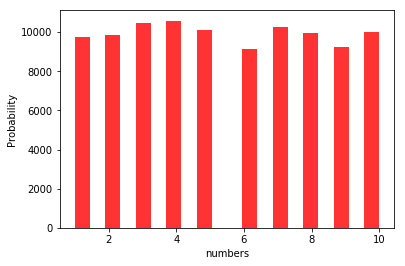

C:\Users\anubh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\anubh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


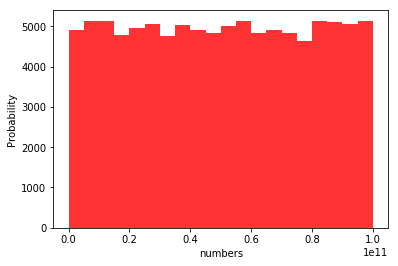

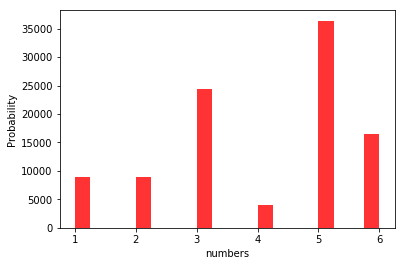

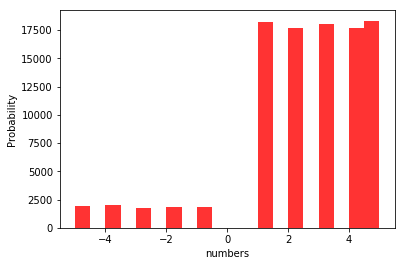

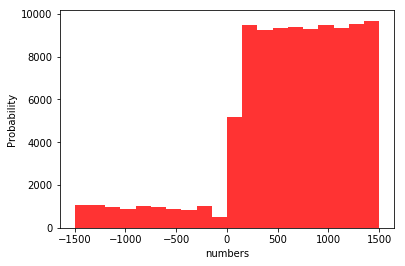

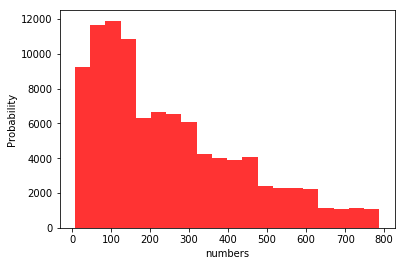

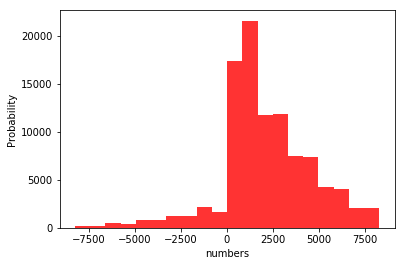

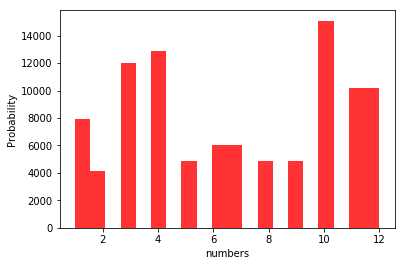

In [16]:
for i in cust_final.columns:
      if cust_final[i].dtype=='float':
            num_bins = 20
            n, bins, patches = plt.hist(cust_final[i], num_bins, facecolor='red', alpha=0.8)
            plt.xlabel('numbers')
            plt.ylabel('Probability')
            plt.show()
      

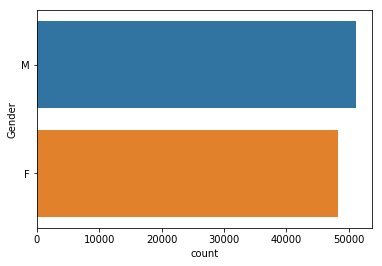

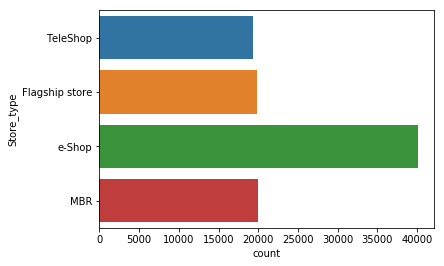

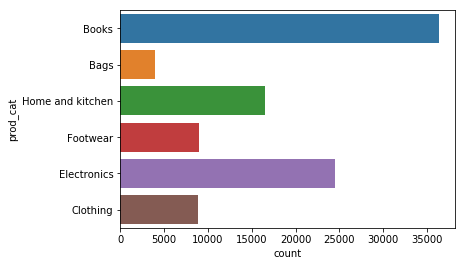

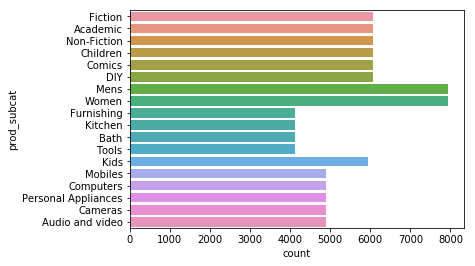

In [17]:
for i in cust_final.columns:
      if cust_final[i].dtype=='object':
            sns.countplot(y = cust_final[i])  
            plt.show()
            

In [18]:
from datetime import date

d0 = date(2014,1,13)
d1 = date(2012,4,7)
delta = d0- d1
print("time Period ",delta.days,"days")

time Period  646 days


In [19]:
cust_final.head()

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,prod_sub_cat_code
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction,7.0
1,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Academic,12.0
2,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Non-Fiction,10.0
3,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Children,11.0
4,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Comics,3.0


In [20]:
np.count_nonzero(np.where(cust_final["total_amt"]<0))

9291

In [21]:
fam_prod =cust_final.groupby(['prod_cat', 'Gender']).agg({'Gender': 'count'})
fam_prod

Gender
prod_cat         Gender        
Bags             F         1988
                 M         2006
Books            F        17694
                 M        18690
Clothing         F         4317
                 M         4554
Electronics      F        11630
                 M        12840
Footwear         F         4587
                 M         4407
Home and kitchen F         7976
                 M         8528

In [22]:
city_max = cust_final.groupby(['city_code']).agg({'city_code': 'count'})
city_max
city_tot = city_max.sum()
per_city = city_max.div(city_tot, level = "city_code") * 100
print("population from each city\n",city_max,"\npercent from each city",per_city)


population from each city
            city_code
city_code           
1.0             9733
2.0             9840
3.0            10486
4.0            10584
5.0            10132
6.0             9121
7.0            10270
8.0             9976
9.0             9228
10.0            9988 
percent from each city            city_code
city_code           
1.0         9.795890
2.0         9.903581
3.0        10.553755
4.0        10.652388
5.0        10.197468
6.0         9.179935
7.0        10.336359
8.0        10.040460
9.0         9.287627
10.0       10.052537


In [23]:
st_qval = cust_final.groupby('Store_type').agg({'total_amt':'sum','Qty':'count'})
st_qval

,total_amt,Qty
Store_type,,
Flagship store,4.188033e+07,19807
MBR,4.166486e+07,19965
TeleShop,4.034773e+07,19282
e-Shop,8.589862e+07,40163


In [24]:
st_Male=cust_final.loc[(cust_final.Gender == 'M')& (cust_final.prod_cat == 'Electronics')]
print("Electronics By Males = Rs",st_Male.total_amt.sum())

Electronics By Males = Rs 28488148.650000002


In [25]:
st_ele= cust_final.loc[(cust_final.Store_type == 'Flagship store')&(cust_final.prod_cat == 'Electronics')]
print("Electronics Flagship store = Rs",st_ele.total_amt.sum())
st_clth =cust_final.loc[(cust_final.Store_type == 'Flagship store')&(cust_final.prod_cat == 'Clothing')]
print("Clothing Flagship store    = Rs",st_clth.total_amt.sum())

Electronics Flagship store = Rs 11072564.1
Clothing Flagship store    = Rs 3583269.69


In [29]:
st_tr = cust_final.loc[(cust_final.total_amt>0)&(cust_final.transaction_id)]
st_tr
cust_final.transaction_id.unique()



array([8.72438356e+10, 1.61978680e+10, 2.88101411e+10, ...,
       2.62086909e+10, 5.73588222e+10, 5.81605443e+10])

In [30]:
now = pd.to_datetime('now')
now

cust_final['age'] =(now - cust_final['DOB']).astype('<m8[Y]') 
cust_final.head(50)
st_age=cust_final.loc[(cust_final.age>=25.0)&(cust_final.age<=35.0)& (cust_final.prod_cat == 'Electronics')]
print("Electronics Spent = Rs",st_age.total_amt.sum())
st_age=cust_final.loc[(cust_final.age>=25.0)&(cust_final.age<=35.0) & (cust_final.prod_cat == 'Books')]
print("Books Spent       = Rs",st_age.total_amt.sum())


Electronics Spent = Rs 21121953.450000003
Books Spent       = Rs 28341572.61


In [31]:
st_tv=cust_final.loc[(cust_final.tran_date >='2014-01-01')&(cust_final.tran_date<='2014-03-01')]
print("Total_amt is = Rs",st_tv.total_amt.sum())

Total_amt is = Rs 6033290.055
